# All country coins classification

In [1]:
#import data by kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d wanderdust/coin-images

100% 459M/459M [00:23<00:00, 24.1MB/s]
100% 459M/459M [00:23<00:00, 20.9MB/s]


In [3]:
#file unzip
import zipfile
zip_ref = zipfile.ZipFile('/content/coin-images.zip') 
zip_ref.extractall('/content/')
zip_ref.close()

In [4]:
#import libery
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from  keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten,MaxPooling2D
from keras.callbacks import EarlyStopping

In [5]:
#set path
train_data = '/content/coins/data/train'
test_data = '/content/coins/data/test'
val_data = '/content/coins/data/validation'

In [6]:
#spliting the dataset train and test
train_data=tf.keras.preprocessing.image_dataset_from_directory(train_data,validation_split=0.2,
                                                               image_size=(150,150),
                                                               batch_size=32,
                                                               subset="training",
                                                               seed=123)

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_data,validation_split=0.2,
                                                               image_size=(150,150),
                                                               batch_size=32,
                                                               subset="validation",
                                                               seed=123)
val_data=tf.keras.preprocessing.image_dataset_from_directory(val_data,validation_split=0.2,
                                                               image_size=(150,150),
                                                               batch_size=32,
                                                               subset="validation",
                                                               seed=123)

Found 6413 files belonging to 211 classes.
Using 5131 files for training.
Found 844 files belonging to 211 classes.
Using 168 files for validation.
Found 844 files belonging to 211 classes.
Using 168 files for validation.


In [7]:
#check class name
class_names = train_data.class_names
class_names

['1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '17',
 '170',
 '171',
 '172',
 '173',
 '174',
 '175',
 '176',
 '177',
 '178',
 '179',
 '18',
 '180',
 '181',
 '182',
 '183',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '19',
 '190',
 '191',
 '192',
 '193',
 '194',
 '195',
 '196',
 '197',
 '198',
 '199',
 '2',
 '20',
 '200',
 '201',
 '202',
 '203',
 '204',
 '205',
 '206',
 '207',
 '208',
 '209',
 '21',
 '210',
 '211',
 '22',
 

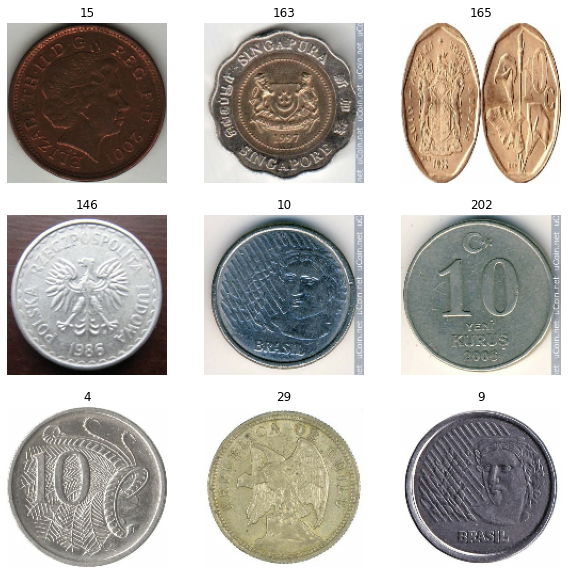

In [8]:
#ploting image
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [11]:
# Criando o modelo base em cima do modelo MobileNetV3
base_model = keras.applications.MobileNetV3Small(input_shape=(150, 150, 3),
                                            classes=400,
                                            include_top=False,
                                            weights='imagenet')

4334752/4334752 [==============================] - 1s 0us/step


In [12]:
# Freeze convolutional base
base_model.trainable = False
base_model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 150, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 75, 75, 16)   432         ['rescaling[0][0]']              
                                                                                                  
 Conv/BatchNorm (BatchNormaliza  (None, 75, 75, 16)  64          ['Conv[0][0]']    

In [13]:
#data augmentation
data_augmentation = keras.models.Sequential([
  keras.layers.RandomFlip('horizontal'),
  keras.layers.RandomRotation(0.2)
])

In [14]:
#cnn model
num_classes = len(class_names)

inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
x = keras.applications.mobilenet_v3.preprocess_input(inputs)
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)


outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [15]:
#compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 5, 5, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 576)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 211)               121747    
                                                                 
Total params: 1,060,867
Trainable params: 121,747
Non-trainab

In [16]:
#fitting model
initial_epochs = 15

early_stop = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)

history = model.fit(train_data, 
          validation_data=test_data,
          epochs=initial_epochs,
          callbacks=[early_stop])

Epoch 1/15
161/161 [==============================] - 19s 60ms/step - loss: 4.8893 - accuracy: 0.1066 - val_loss: 4.0357 - val_accuracy: 0.2202
Epoch 2/15
161/161 [==============================] - 9s 52ms/step - loss: 3.3599 - accuracy: 0.3535 - val_loss: 3.1335 - val_accuracy: 0.4226
Epoch 3/15
161/161 [==============================] - 9s 52ms/step - loss: 2.5683 - accuracy: 0.5155 - val_loss: 2.6183 - val_accuracy: 0.4881
Epoch 4/15
161/161 [==============================] - 9s 52ms/step - loss: 2.1027 - accuracy: 0.6116 - val_loss: 2.2891 - val_accuracy: 0.5417
Epoch 5/15
161/161 [==============================] - 9s 52ms/step - loss: 1.7820 - accuracy: 0.6673 - val_loss: 2.0558 - val_accuracy: 0.5774
Epoch 6/15
161/161 [==============================] - 9s 52ms/step - loss: 1.5423 - accuracy: 0.7110 - val_loss: 1.9176 - val_accuracy: 0.5952
Epoch 7/15
161/161 [==============================] - 9s 52ms/step - loss: 1.3567 - accuracy: 0.7496 - val_loss: 1.8002 - val_accuracy: 0.619

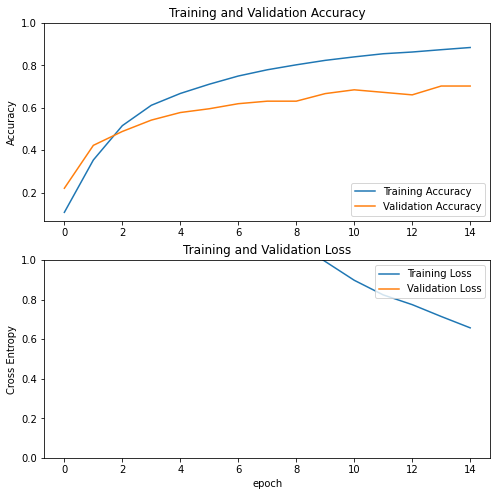

In [17]:
#check accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [18]:
#Visualize the result
results = model.evaluate(test_data, verbose=0)

In [19]:
print("Test Loss: {:.5f}".format(results[0]))
print("Accuracy on the test set: {:.2f}%".format(results[1] * 100))

Test Loss: 1.36096
Accuracy on the test set: 70.24%


# Model Testing

1/1 [==============================] - 1s 699ms/step


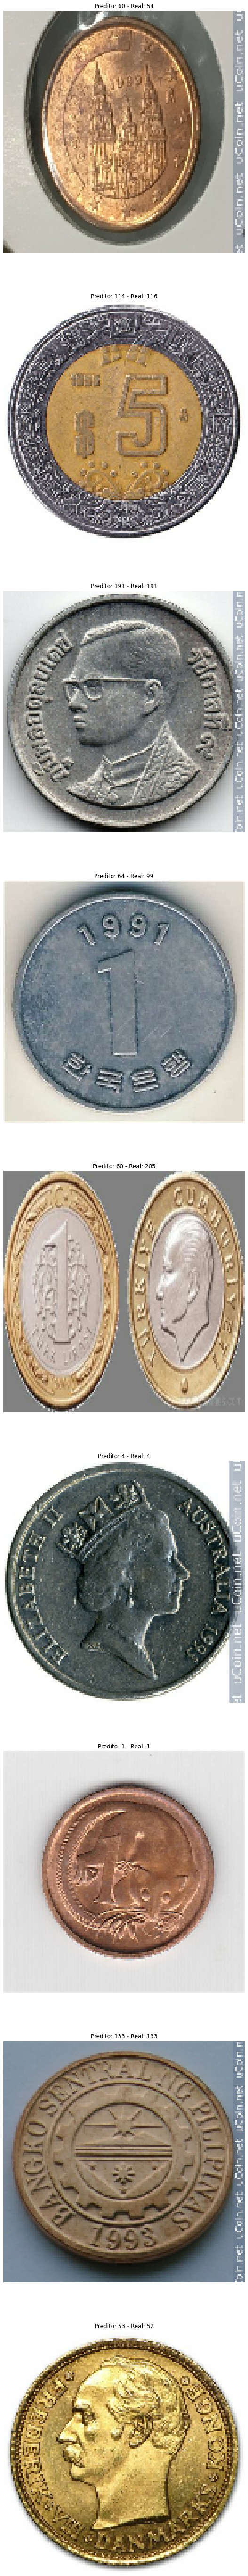

In [20]:
plt.figure(figsize=(10, 100))
for images, labels in test_data.take(1):
    prediction = model.predict(images,batch_size=32)
    for i in range(9):
        ax = plt.subplot(9, 1, i+1)
        pred = np.argmax(prediction[i])
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f'Predito: {class_names[pred]} - Real: {class_names[labels[i]]}')
        plt.axis('off')